in this notebook we will read and analyze stackoverflow survey results from 2020. 

In [204]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display
from collections import defaultdict

%matplotlib inline

df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


- keep only columns we are interested in and remove out of scope columns

In [205]:
# not needed: 'Hobbyist', 'CompFreq', 'CompTotal',  'CurrencyDesc', 'CurrencySymbol', 'Ethnicity', 'JobSeek', 'NEWDevOps', 'NEWDevOpsImpt',  'NEWJobHunt', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWPurpleLink', 'NEWSOSites', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SurveyEase', 'SurveyLength', 'Trans','WelcomeChange','Age1stCode','DevType','NEWOvertime','NEWPurchaseResearch','OpSys', 'OrgSize','WorkWeekHrs','YearsCode','YearsCodePro'

#These attributes will remain
df = df[[ 'Respondent', 'MainBranch', 'Age', 'Country','EdLevel','Employment','Gender', 'JobSat','NEWLearn', 'NEWStuck','ConvertedComp', 'SOPartFreq', 'SOVisitFreq', 'UndergradMajor', 'JobFactors','NEWEdImpt','NEWJobHuntResearch',
'DatabaseWorkedWith', 'DatabaseDesireNextYear',
'LanguageWorkedWith','LanguageDesireNextYear',
'MiscTechWorkedWith','MiscTechDesireNextYear',
'NEWCollabToolsWorkedWith', 'NEWCollabToolsDesireNextYear', 
'PlatformWorkedWith','PlatformDesireNextYear',
'WebframeWorkedWith', 'WebframeDesireNextYear']]

df.head()

,Respondent,MainBranch,Age,Country,EdLevel,Employment,Gender,JobSat,NEWLearn,NEWStuck,...,LanguageWorkedWith,LanguageDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,NEWCollabToolsWorkedWith,NEWCollabToolsDesireNextYear,PlatformDesireNextYear,PlatformWorkedWith,WebframeWorkedWith,WebframeDesireNextYear
0,1,I am a developer by profession,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Man,Slightly satisfied,Once a year,Visit Stack Overflow;Go for a walk or other ph...,...,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET;.NET Core,.NET Core;Xamarin,Confluence;Jira;Slack;Microsoft Azure;Trello,Microsoft Teams;Microsoft Azure;Trello,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,ASP.NET;ASP.NET Core,ASP.NET Core
1,2,I am a developer by profession,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Very dissatisfied,Once a year,Visit Stack Overflow;Go for a walk or other ph...,...,JavaScript;Swift,Python;Swift,React Native,React Native;TensorFlow;Unity 3D,Confluence;Jira;Github;Gitlab;Slack,Github;Slack,iOS;Kubernetes;Linux;MacOS,iOS,NaN,NaN
2,3,I code primarily as a hobby,NaN,Russian Federation,NaN,NaN,NaN,NaN,Once a decade,NaN,...,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,I am a developer by profession,25.0,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Man,Slightly dissatisfied,Once a year,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"I used to be a developer by profession, but no...",31.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,NaN,Once a year,Call a coworker or friend;Visit Stack Overflow...,...,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Ansible,Ansible;Chef,Confluence;Jira;Github;Slack;Google Suite (Doc...,"Github;Google Suite (Docs, Meet, etc)",Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,Ruby on Rails,Django;Ruby on Rails


- Create new column for Age Range and drop the "Age" (not needed)

In [206]:
#add a new column for Age Range and remove age
labels = ['1039', '40-69', '70+']
bins = [10, 40, 70, 120]
df['AgeRange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
df.drop(labels=["Age"],axis=1,inplace=True)

df.head()

,Respondent,MainBranch,Country,EdLevel,Employment,Gender,JobSat,NEWLearn,NEWStuck,ConvertedComp,...,LanguageDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,NEWCollabToolsWorkedWith,NEWCollabToolsDesireNextYear,PlatformDesireNextYear,PlatformWorkedWith,WebframeWorkedWith,WebframeDesireNextYear,AgeRange
0,1,I am a developer by profession,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Man,Slightly satisfied,Once a year,Visit Stack Overflow;Go for a walk or other ph...,NaN,...,C#;HTML/CSS;JavaScript,.NET;.NET Core,.NET Core;Xamarin,Confluence;Jira;Slack;Microsoft Azure;Trello,Microsoft Teams;Microsoft Azure;Trello,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,ASP.NET;ASP.NET Core,ASP.NET Core,NaN
1,2,I am a developer by profession,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Very dissatisfied,Once a year,Visit Stack Overflow;Go for a walk or other ph...,NaN,...,Python;Swift,React Native,React Native;TensorFlow;Unity 3D,Confluence;Jira;Github;Gitlab;Slack,Github;Slack,iOS;Kubernetes;Linux;MacOS,iOS,NaN,NaN,NaN
2,3,I code primarily as a hobby,Russian Federation,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,...,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,I am a developer by profession,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Man,Slightly dissatisfied,Once a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1039
4,5,"I used to be a developer by profession, but no...",United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,NaN,Once a year,Call a coworker or friend;Visit Stack Overflow...,NaN,...,Java;Ruby;Scala,Ansible,Ansible;Chef,Confluence;Jira;Github;Slack;Google Suite (Doc...,"Github;Google Suite (Docs, Meet, etc)",Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,Ruby on Rails,Django;Ruby on Rails,1039


In [207]:
df.describe()

,Respondent,ConvertedComp
count,64461.000000,3.475600e+04
mean,32554.079738,1.037561e+05
std,18967.442360,2.268853e+05
min,1.000000,0.000000e+00
25%,16116.000000,2.464800e+04
50%,32231.000000,5.404900e+04
75%,49142.000000,9.500000e+04
max,65639.000000,2.000000e+06


In [208]:
print ('number of Respondents:', df.shape[0])
print ('number of columns we are working with:', df.shape[1])

number of Respondents: 64461
number of columns we are working with: 29


- Check what columns has null values to determin proper action with them 

In [209]:
df.isnull().sum()

Respondent                          0
MainBranch                        299
Country                           389
EdLevel                          7030
Employment                        607
Gender                          13904
JobSat                          19267
NEWLearn                         8305
NEWStuck                         9478
ConvertedComp                   29705
SOPartFreq                      17669
SOVisitFreq                      7491
UndergradMajor                  13466
JobFactors                      15112
NEWEdImpt                       15996
NEWJobHuntResearch              23439
DatabaseWorkedWith              14924
DatabaseDesireNextYear          20391
LanguageWorkedWith               7083
LanguageDesireNextYear          10348
MiscTechWorkedWith              24147
MiscTechDesireNextYear          22082
NEWCollabToolsWorkedWith        11578
NEWCollabToolsDesireNextYear    17174
PlatformDesireNextYear          13856
PlatformWorkedWith              10618
WebframeWork

- Understanding the data 

<AxesSubplot:title={'center':'Being developer'}, ylabel='MainBranch'>

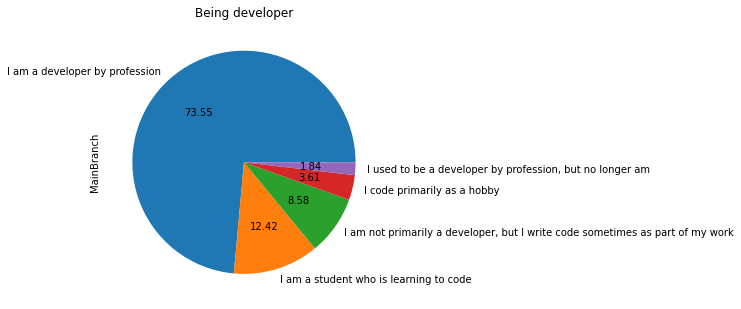

In [230]:
# Relation of Respondents to being developer
df.MainBranch.dropna().value_counts().plot(kind='pie', figsize=(5,10), autopct="%0.2f", title="Being developer")

<AxesSubplot:title={'center':'Employment'}, ylabel='Employment'>

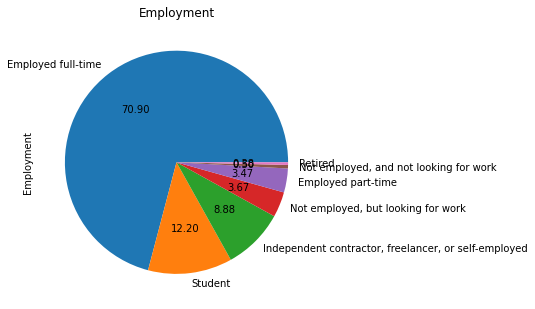

In [231]:
# Relation of Respondents to being employed
df.Employment.dropna().value_counts().plot(kind='pie', figsize=(5,10), autopct="%0.2f", title="Employment")

<AxesSubplot:title={'center':'Education'}, ylabel='EdLevel'>

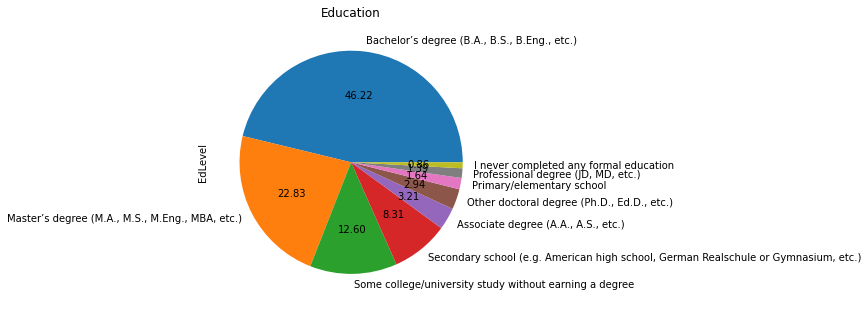

In [227]:
# relation of Respondents to their Education
df.EdLevel.dropna().value_counts().plot(kind='pie', figsize=(5,10), autopct="%0.2f", title="Education")

In [213]:
#Finding the number of unique countries of all Respondent
df.Country.describe()

count             64072
unique              183
top       United States
freq              12469
Name: Country, dtype: object

Finding the top technologys for 2020 and  what is expected to be the next top technologies for 2021.

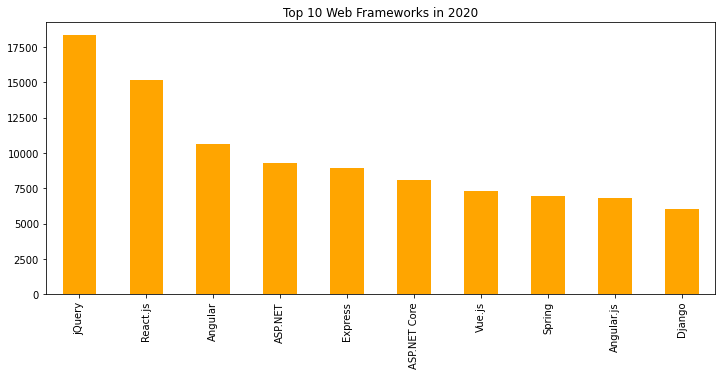

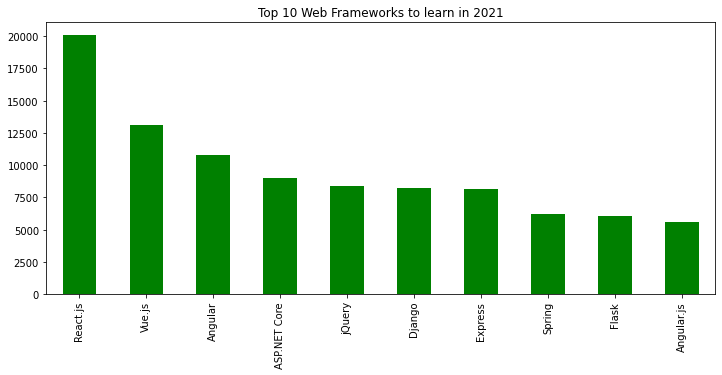

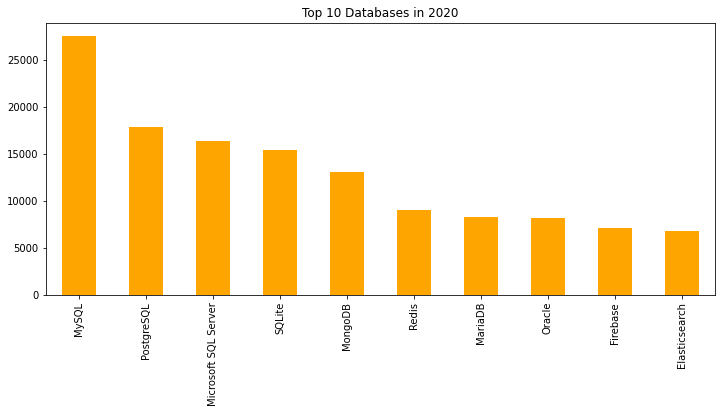

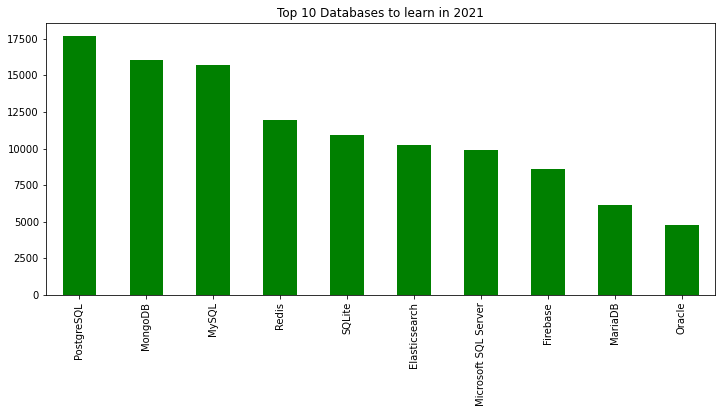

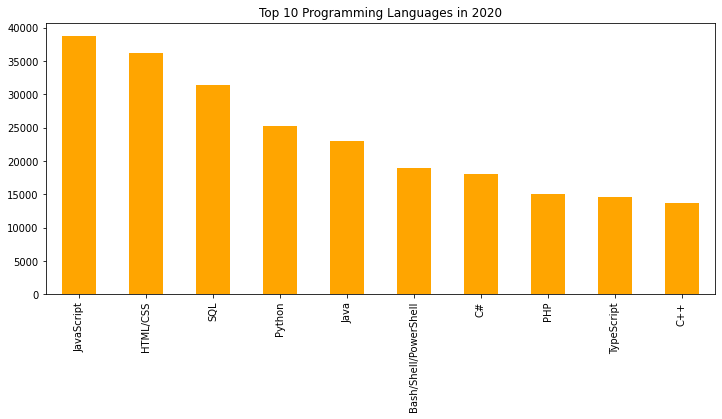

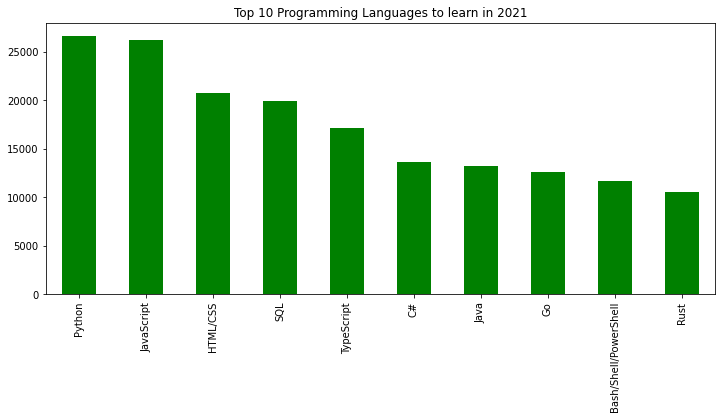

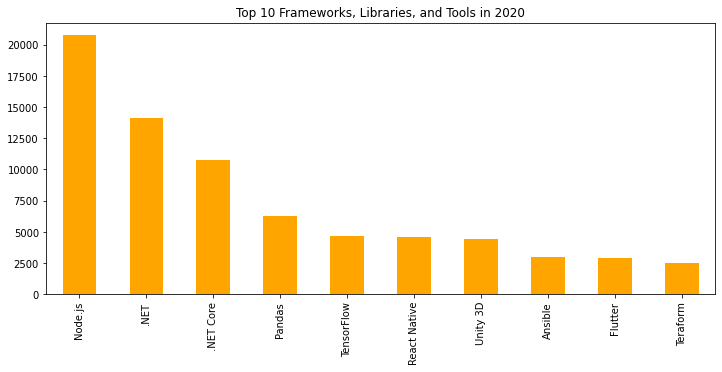

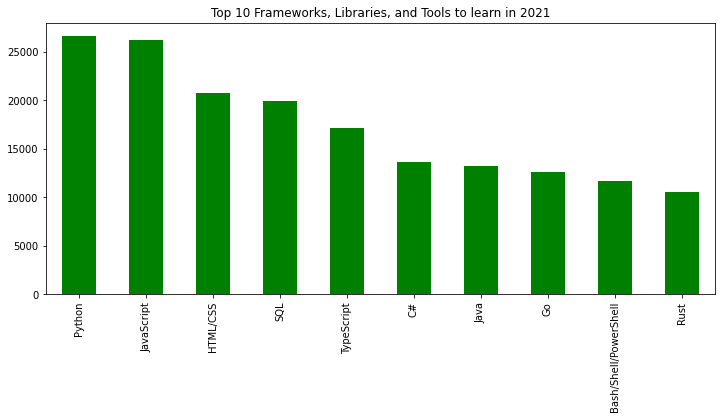

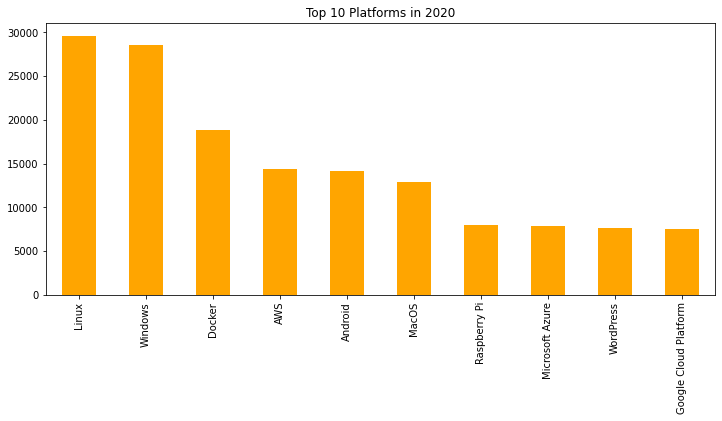

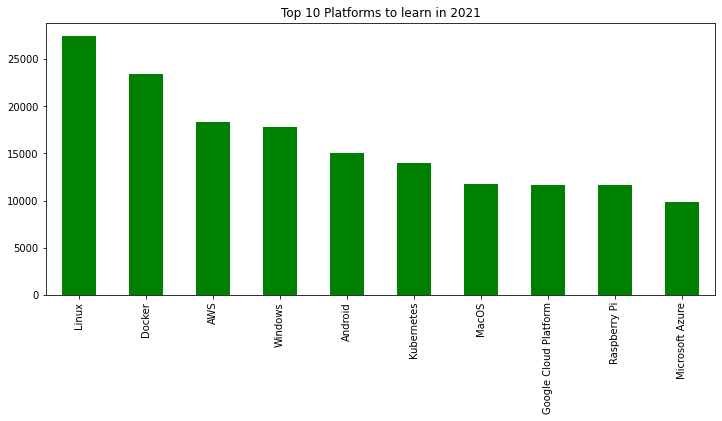

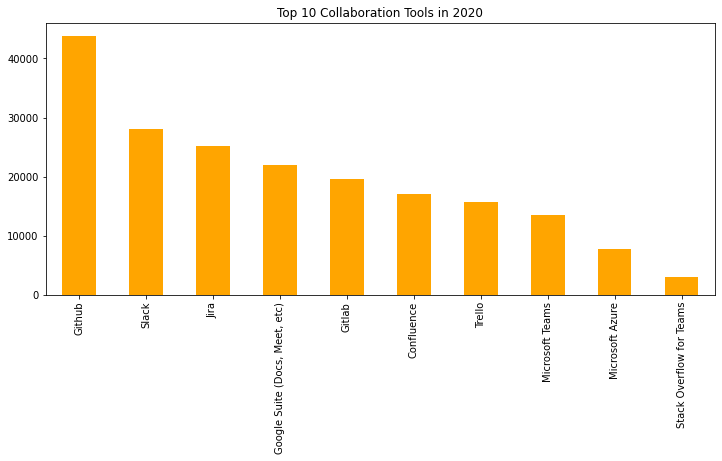

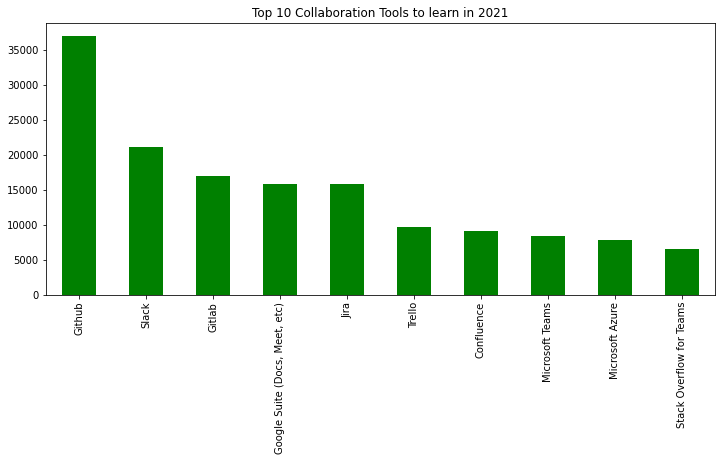

In [236]:

# Reusable functions for plotting
def plot2020(df_20, col, title):
    df_20.groupby(col).count().nlargest(10, 'Respondent').plot(kind="bar",color='orange', figsize=(12,5), title="Top 10 " + title + " in 2020", legend=None).set_xlabel('')

def plot2021(df_21, col, title):
    df_21.groupby(col).count().nlargest(10, 'Respondent').plot(kind="bar",color='green', figsize=(12,5), title="Top 10 " + title + " to learn in 2021", legend=None).set_xlabel('')

#Web Frameworks
sub_df = df[['Respondent', 'WebframeWorkedWith']].dropna()
sub_df = sub_df.assign(WebframeWorkedWith = sub_df.WebframeWorkedWith.str.split(";")).explode("WebframeWorkedWith")
plot2020(sub_df, "WebframeWorkedWith", "Web Frameworks")

sub_df = df[['Respondent', 'WebframeDesireNextYear']].dropna()
sub_df = sub_df.assign(WebframeDesireNextYear = sub_df.WebframeDesireNextYear.str.split(";")).explode("WebframeDesireNextYear")
plot2021(sub_df, "WebframeDesireNextYear", "Web Frameworks")

#DB
sub_df = df[['Respondent', 'DatabaseWorkedWith']].dropna()
sub_df = sub_df.assign(DatabaseWorkedWith = sub_df.DatabaseWorkedWith.str.split(";")).explode("DatabaseWorkedWith")
plot2020(sub_df, "DatabaseWorkedWith", "Databases")

sub_df = df[['Respondent', 'DatabaseDesireNextYear']].dropna()
sub_df = sub_df.assign(DatabaseDesireNextYear = sub_df.DatabaseDesireNextYear.str.split(";")).explode("DatabaseDesireNextYear")
plot2021(sub_df, "DatabaseDesireNextYear", "Databases")

#programming languages
sub_df = df[['Respondent', 'LanguageWorkedWith']].dropna()
sub_df = sub_df.assign(LanguageWorkedWith = sub_df.LanguageWorkedWith.str.split(";")).explode("LanguageWorkedWith")
plot2020(sub_df, "LanguageWorkedWith", "Programming Languages")

sub_df = df[['Respondent', 'LanguageDesireNextYear']].dropna()
sub_df = sub_df.assign(LanguageDesireNextYear = sub_df.LanguageDesireNextYear.str.split(";")).explode("LanguageDesireNextYear")
plot2021(sub_df, "LanguageDesireNextYear", "Programming Languages")

#MiscTech
sub_df = df[['Respondent', 'MiscTechWorkedWith']].dropna()
sub_df = sub_df.assign(MiscTechWorkedWith = sub_df.MiscTechWorkedWith.str.split(";")).explode("MiscTechWorkedWith")
plot2020(sub_df, "MiscTechWorkedWith", "Frameworks, Libraries, and Tools")

sub_df = df[['Respondent', 'LanguageDesireNextYear']].dropna()
sub_df = sub_df.assign(LanguageDesireNextYear = sub_df.LanguageDesireNextYear.str.split(";")).explode("LanguageDesireNextYear")
plot2021(sub_df, "LanguageDesireNextYear", "Frameworks, Libraries, and Tools")

#Platforms
sub_df = df[['Respondent', 'PlatformWorkedWith']].dropna()
sub_df = sub_df.assign(PlatformWorkedWith = sub_df.PlatformWorkedWith.str.split(";")).explode("PlatformWorkedWith")
plot2020(sub_df, "PlatformWorkedWith", "Platforms")

sub_df = df[['Respondent', 'PlatformDesireNextYear']].dropna()
sub_df = sub_df.assign(PlatformDesireNextYear = sub_df.PlatformDesireNextYear.str.split(";")).explode("PlatformDesireNextYear")
plot2021(sub_df, "PlatformDesireNextYear", "Platforms")

#CollabTools
sub_df = df[['Respondent', 'NEWCollabToolsWorkedWith']].dropna()
sub_df = sub_df.assign(NEWCollabToolsWorkedWith = sub_df.NEWCollabToolsWorkedWith.str.split(";")).explode("NEWCollabToolsWorkedWith")
plot2020(sub_df, "NEWCollabToolsWorkedWith", "Collaboration Tools")

sub_df = df[['Respondent', 'NEWCollabToolsDesireNextYear']].dropna()
sub_df = sub_df.assign(NEWCollabToolsDesireNextYear = sub_df.NEWCollabToolsDesireNextYear.str.split(";")).explode("NEWCollabToolsDesireNextYear")
plot2021(sub_df, "NEWCollabToolsDesireNextYear", "Collaboration Tools")



Q2: what is the relatonship between Educational level and Employment/Job Satisfaction

<AxesSubplot:title={'center':'UndergradMajor based on their Education'}, xlabel='EdLevel'>

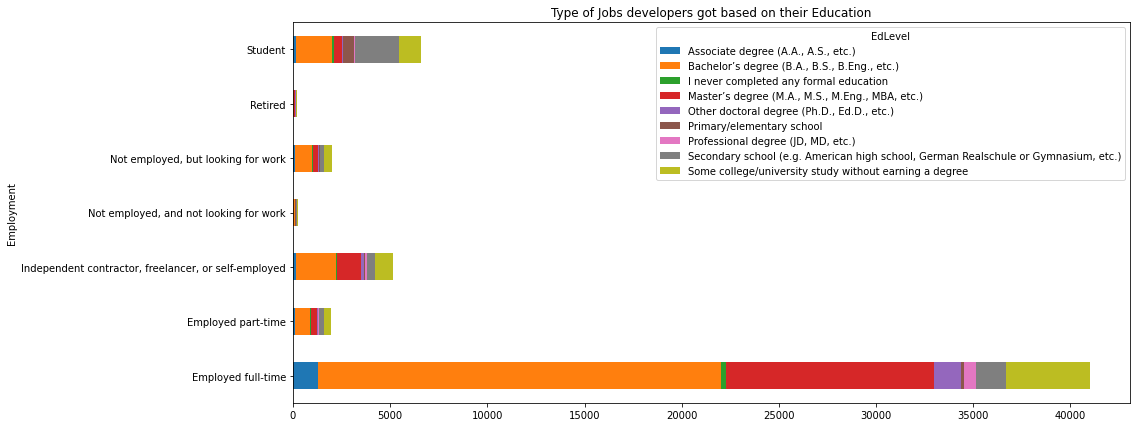

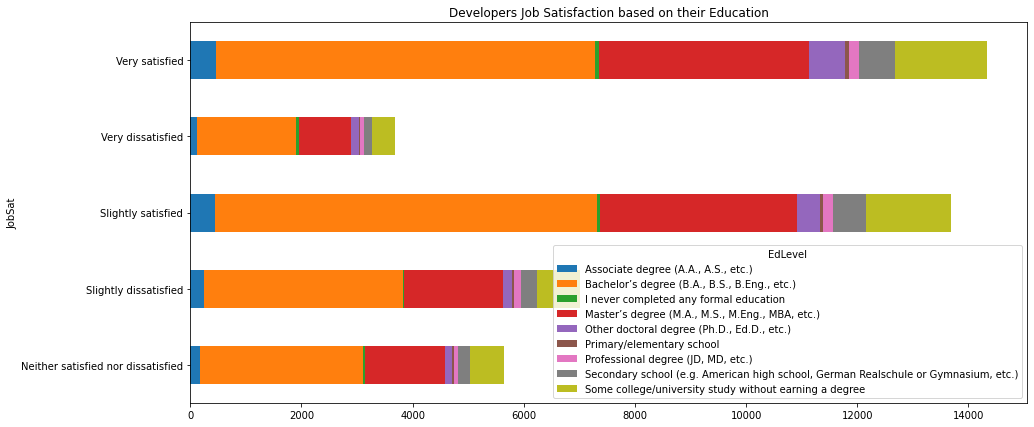

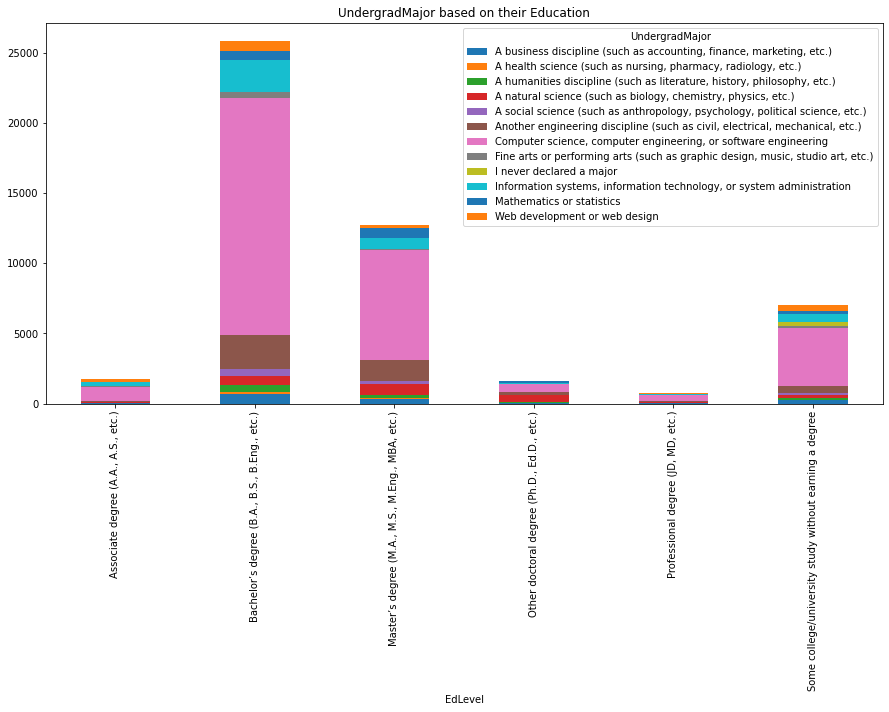

In [215]:
pd.crosstab(df["Employment"],df["EdLevel"]).plot(kind="barh", stacked=True, figsize = (15,7), title="Type of Jobs developers got based on their Education")
pd.crosstab(df["JobSat"],df["EdLevel"]).plot(kind="barh",stacked=True, figsize = (15,7), title="Developers Job Satisfaction based on their Education")
pd.crosstab(df["EdLevel"],df["UndergradMajor"]).plot(kind="bar",stacked=True, figsize = (15,7), title="UndergradMajor based on their Education")

Q2: how to act when I am stuck on a problem? how often should i learn a new technology? How to decide which educational level is appropriate to get a full time job?

<AxesSubplot:title={'center':'stuck on problem'}, ylabel='NEWStuck'>

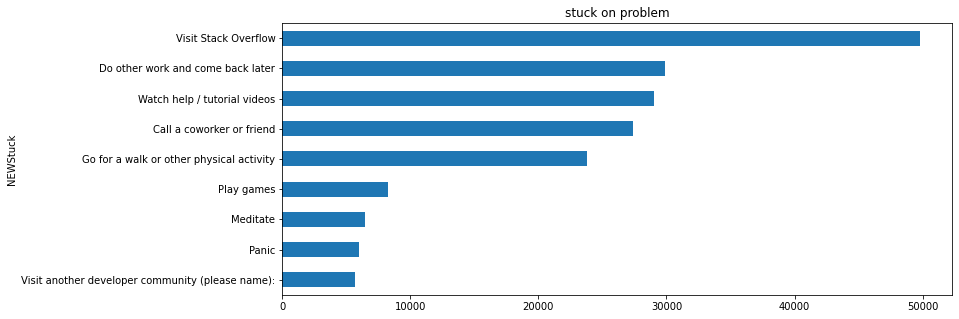

In [224]:
# Stuck on problem
sub_df = df[['Respondent', 'NEWStuck']].dropna()
sub_df = sub_df.assign(NEWStuck = sub_df.NEWStuck.str.split(";")).explode("NEWStuck")
sub_df.groupby('NEWStuck').count().sort_values(['Respondent']).plot(kind="barh", figsize=(12,5), title="stuck on problem", legend=None)

<AxesSubplot:ylabel='NEWLearn'>

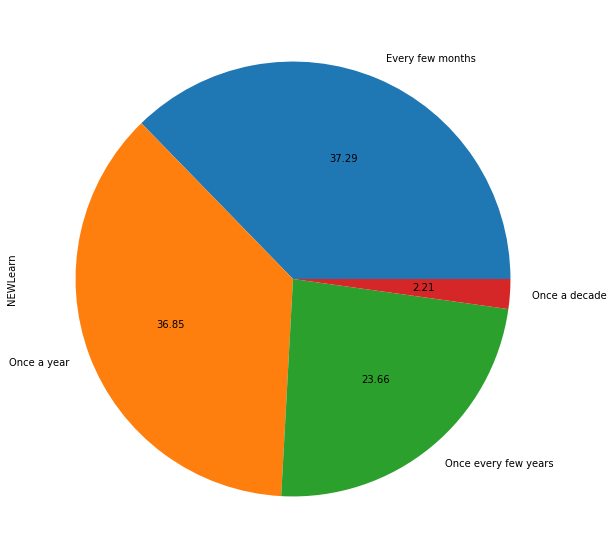

In [217]:
# how often should you learn new tech
df.NEWLearn.dropna().value_counts().plot(kind='pie', autopct="%0.2f", figsize=(10,10))

<AxesSubplot:title={'center':'Job Factors'}, ylabel='JobFactors'>

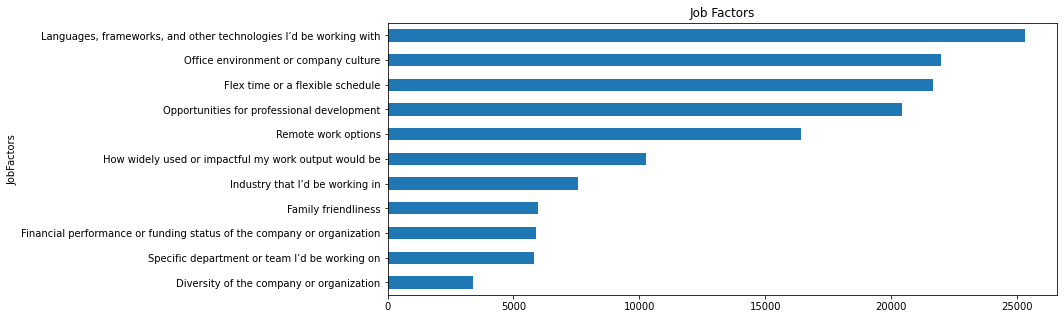

In [218]:
# top priorites for developers when seeking jobs
sub_df = df[['Respondent', 'JobFactors']].dropna()
sub_df = sub_df.assign(JobFactors = sub_df.JobFactors.str.split(";")).explode("JobFactors")
sub_df.groupby('JobFactors').count().sort_values(['Respondent']).plot(kind="barh", figsize=(12,5), title="Job Factors", legend=None)

<AxesSubplot:ylabel='NEWEdImpt'>

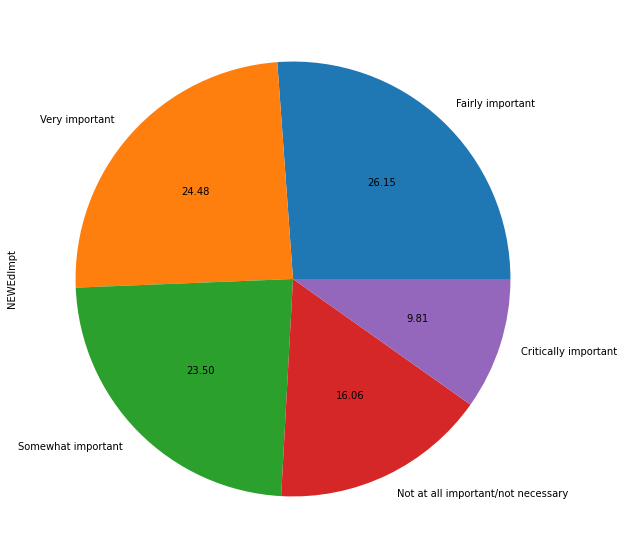

In [219]:
#How important is a formal education, such as a university degree in computer science, to your career?
df.NEWEdImpt.dropna().value_counts().plot(kind='pie', autopct="%0.2f", figsize=(10,10))

<AxesSubplot:title={'center':'Job Factors'}, ylabel='NEWJobHuntResearch'>

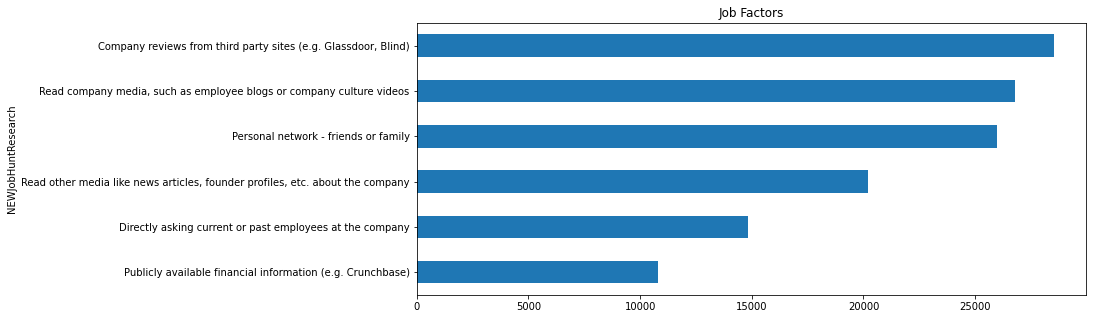

In [220]:
#When job searching, how do you learn more about a company? 
sub_df = df[['Respondent', 'NEWJobHuntResearch']].dropna()
sub_df = sub_df.assign(NEWJobHuntResearch = sub_df.NEWJobHuntResearch.str.split(";")).explode("NEWJobHuntResearch")
sub_df.groupby('NEWJobHuntResearch').count().sort_values(['Respondent']).plot(kind="barh", figsize=(12,5), title="Job Factors", legend=None)

<AxesSubplot:>

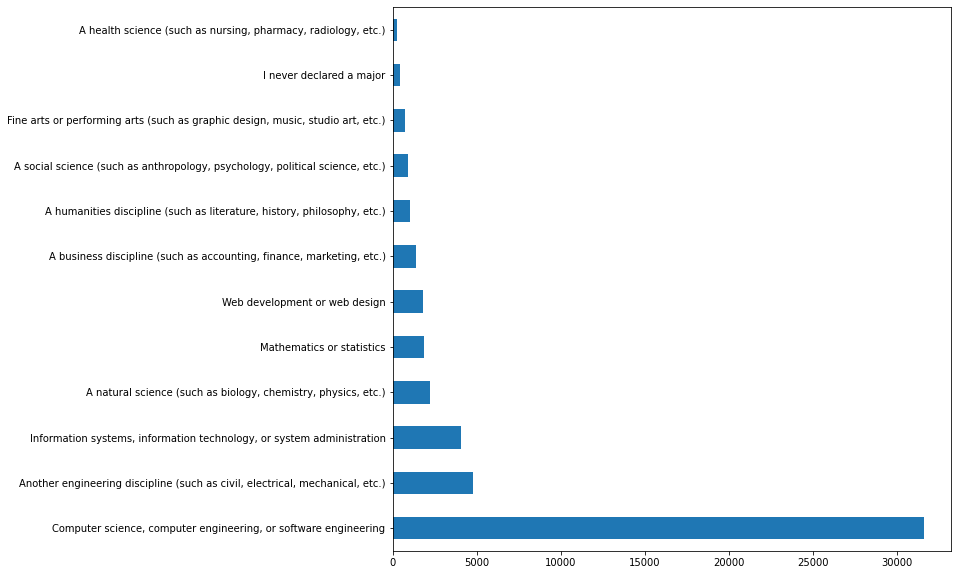

In [221]:
#What was your primary field of study?
df.UndergradMajor.dropna().value_counts().plot(kind='barh', figsize=(10,10))

<AxesSubplot:xlabel='AgeRange'>

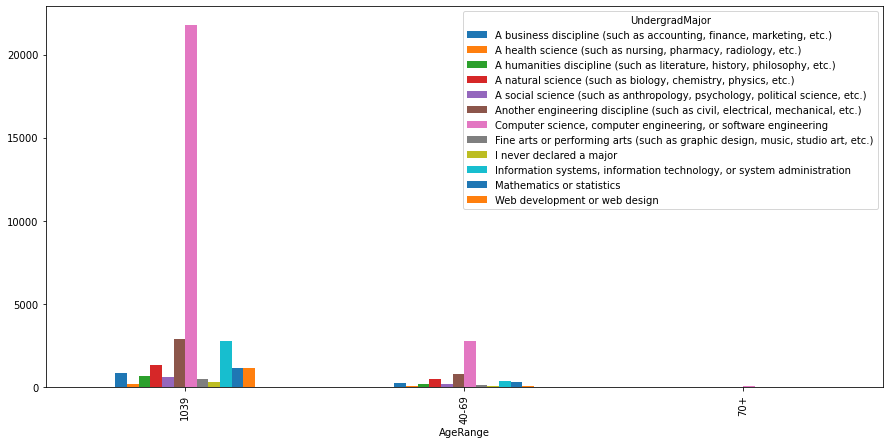

In [222]:
# primary field of study based on age
pd.crosstab(df["AgeRange"],df["UndergradMajor"]).plot(kind="bar",  figsize = (15,7))